In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, spearmanr
from sklearn.neighbors import KernelDensity
import pickle
import seaborn as sns

from matplotlib import pyplot as plt
PATH = '../data/'
%matplotlib inline

# Functions

# Parse data

In [2]:
df = pd.read_csv(PATH + 'train.csv', low_memory=False)
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 49 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

In [4]:
df.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,5.097620e+05,5.097620e+05,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509744.000000,509748.000000,5.097620e+05,...,509762.000000,509762.000000,509762.000000,5.097620e+05,509696.000000,509762.000000,509762.000000,509762.000000,461230.000000,503602.000000
mean,2.017594e+09,2.017594e+13,60.040304,26.783535,2.591912,1.683176,0.279406,180.247779,179.933859,2.344703e+06,...,8.329248,11.148073,9.501057,2.419204e+06,6.943025,4.212334,253.554388,9.096370,60.436442,55.646062
std,4.997098e+05,4.997098e+09,25.435261,7.238206,1.383601,0.976412,0.145482,104.298330,106.319488,6.418871e+05,...,3.795208,10.277098,9.366413,5.357783e+05,0.991130,6.436167,48.367386,5.000984,17.570291,25.430976
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,1.000000,-14.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017111e+09,2.017111e+13,39.090000,22.730000,1.500000,0.940000,0.170000,90.630000,89.830000,2.532865e+06,...,6.000000,3.000000,0.000000,2.540011e+06,6.000000,1.000000,210.000000,5.000000,48.000000,43.000000
50%,2.017123e+09,2.017123e+13,60.290000,26.790000,2.470000,1.540000,0.270000,179.700000,180.090000,2.543765e+06,...,10.000000,9.000000,7.000000,2.552582e+06,7.000000,3.000000,245.000000,9.000000,62.000000,59.000000
75%,2.018110e+09,2.018110e+13,80.970000,30.860000,3.560000,2.290000,0.390000,270.400000,270.190000,2.555343e+06,...,10.000000,17.000000,14.000000,2.557976e+06,8.000000,6.000000,305.000000,14.000000,73.000000,71.000000
max,2.018123e+09,2.018123e+13,116.840000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.561671e+06,...,40.000000,57.000000,51.000000,2.561468e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [5]:
df_play = df[df.NflId == df.NflIdRusher]
len(df_play[df_play.Season == 2017]), len(df_play[df_play.Season == 2018])

(11900, 11271)

# Single feature analysis

## Numerical

In [6]:
numerical_cols = np.array(df.dtypes[df.dtypes != 'object'].index)
numerical_cols

array(['GameId', 'PlayId', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'JerseyNumber', 'Season', 'YardLine', 'Quarter',
       'Down', 'Distance', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'NflIdRusher', 'DefendersInTheBox',
       'Yards', 'PlayerWeight', 'Week', 'Temperature', 'Humidity'],
      dtype=object)

### Game and Play Ids

In [7]:
df.GameId.nunique(), df.PlayId.nunique(), df.PlayId.nunique() * 22 == len(df)

(512, 23171, True)

In [8]:
df['month'] = df.GameId.apply(lambda x: int(str(x)[4:6])) 
df.month.unique()

array([ 9, 10, 11, 12])

### Nfl Id and Nfl Id Rusher

In [9]:
df.NflId.nunique(), df.NflIdRusher.nunique()

(2231, 371)

In [13]:
df_play.NflIdRusher.value_counts()

2555224    537
2552475    533
2555418    518
2552469    455
2557917    450
          ... 
2550400      1
2553896      1
2550256      1
2543509      1
2504775      1
Name: NflIdRusher, Length: 371, dtype: int64

### Yards (target)

In [11]:
df.Yards.min(), df.Yards.max()

(-14, 99)

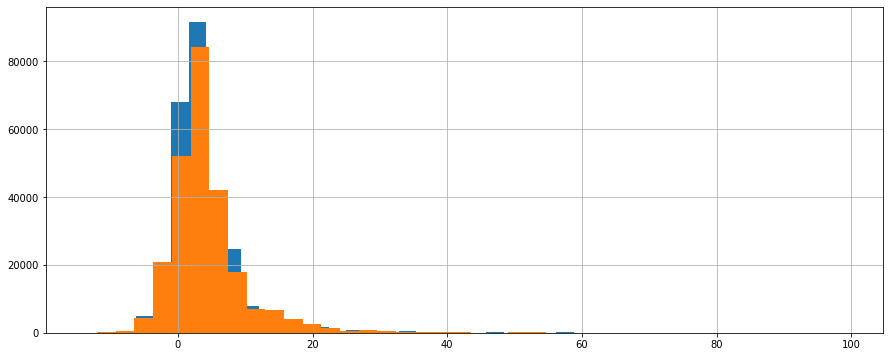

In [76]:
plt.figure(figsize=(15, 6))
plt.hist(df[df.Season == 2017].Yards, bins=40)
plt.hist(df[df.Season == 2018].Yards, bins=40)

plt.grid()
plt.show()

In [13]:
len(df[df.Yards < 0]), len(df[df.Yards == 0]), len(df[df.Yards > 0]), len(df[df.Yards > 3.5])

(56342, 47190, 406230, 221342)

### X, Y

In [14]:
(df.X.min(), df.X.max()), (df.Y.min(), df.Y.max())

((0.66, 116.84), (1.85, 56.45))

### Speed (S)

In [28]:
min_17, max_17 = df[df.Season == 2017].S.min(), df[df.Season == 2017].S.max()
min_17, max_17

(0.0, 9.01)

In [29]:
min_18, max_18 = df[df.Season == 2018].S.min(), df[df.Season == 2018].S.max()
min_18, max_18

(0.0, 9.41)

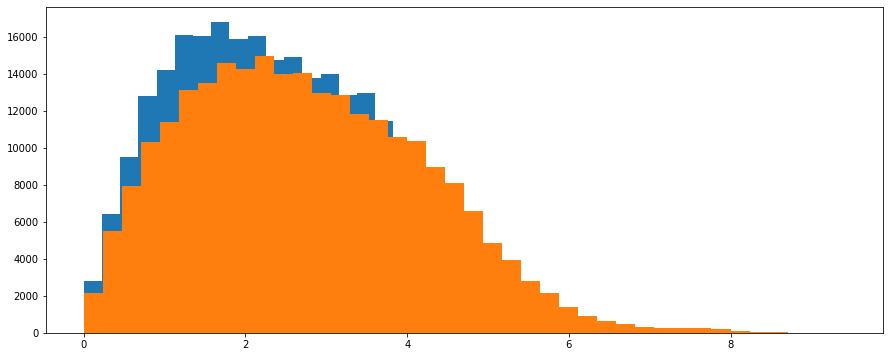

In [45]:
plt.figure(figsize=(15, 6))
plt.hist(df[df.Season == 2017].S, bins=40)
plt.hist(df[df.Season == 2018].S, bins=40)

plt.show()

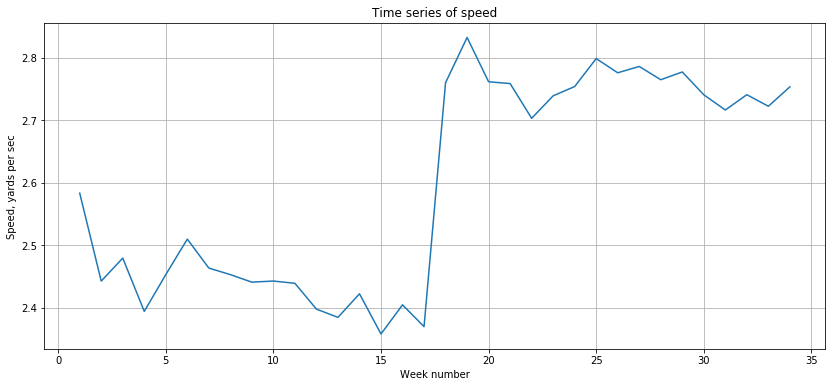

In [16]:
plt.figure(figsize=(14, 6))
df['week_number'] = (df.Season - 2017)* 17 + df.Week
g = df.groupby('week_number').S.mean()
plt.plot(df.week_number, df.week_number.map(g))
plt.title('Time series of speed')
plt.xlabel('Week number')
plt.ylabel('Speed, yards per sec')


plt.grid()
plt.show()

In [17]:
df[df.Season == 2017].S.mean(), df[df.Season == 2018].S.mean()

(2.435519556913674, 2.7570316419451366)

In [18]:
df[df.Season == 2017].S.std(), df[df.Season == 2018].S.std()

(1.2929623410155868, 1.4551321358655713)

### Acceleration (A)

In [68]:
df.A.min(), df.A.max()

(0.0, 10.0)

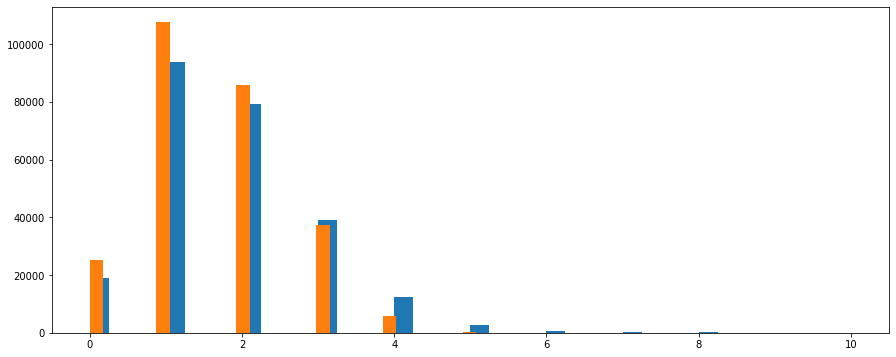

In [69]:
plt.figure(figsize=(15, 6))
plt.hist(df[df.Season == 2018].A, bins=40)
plt.hist(df[df.Season == 2017].A, bins=40)

plt.show()

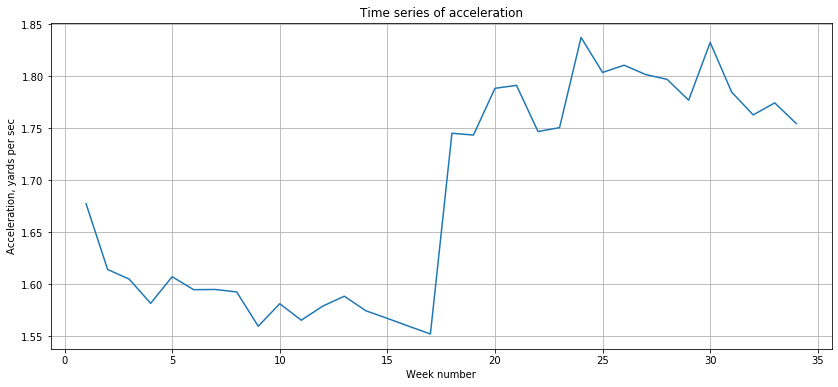

In [70]:
plt.figure(figsize=(14, 6))
df['week_number'] = (df.Season - 2017)* 17 + df.Week
g = df.groupby('week_number').A.mean()
plt.plot(df.week_number, df.week_number.map(g))
plt.title('Time series of acceleration')
plt.xlabel('Week number')
plt.ylabel('Acceleration, yards per sec')


plt.grid()
plt.show()

### Dir, Dis, Orientation

In [57]:
df.Dir.min(), df.Dir.max()

(0.0, 360.0)

In [56]:
df.Orientation.min(), df.Orientation.max()

(0.0, 360.0)

In [58]:
df.Dis.min(), df.Dis.max()

(0.0, 1.39)

### JerseyNumber

In [62]:
df.JerseyNumber.unique()[:10]

array([29, 97, 50, 56, 38, 55, 39, 23, 49, 22])

### YardLine (of the scrimmage line)

In [75]:
df.YardLine.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

### Down 

In [83]:
df.Down.sort_values().unique()

array([1, 2, 3, 4])

### Distance (to first down)

In [82]:
df.Distance.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35,
       40])

### Defenders in the box

In [85]:
df.DefendersInTheBox.sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

### Player Weight

In [94]:
df.PlayerWeight.min(), df.PlayerWeight.max()

(153, 380)

### Week

In [105]:
df[['Season', 'Week']].drop_duplicates().head()

,Season,Week
0,2017,1
14872,2017,2
30734,2017,3
46838,2017,4
63800,2017,5


### Temp and hum

In [96]:
df.Temperature.min(), df.Temperature.max()

(9.0, 97.0)

In [97]:
df.Humidity.min(), df.Humidity.max()

(0.0, 100.0)